C:\Users\rafal\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
14:19:27 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


14:19:27 - cmdstanpy - INFO - CmdStan done processing.


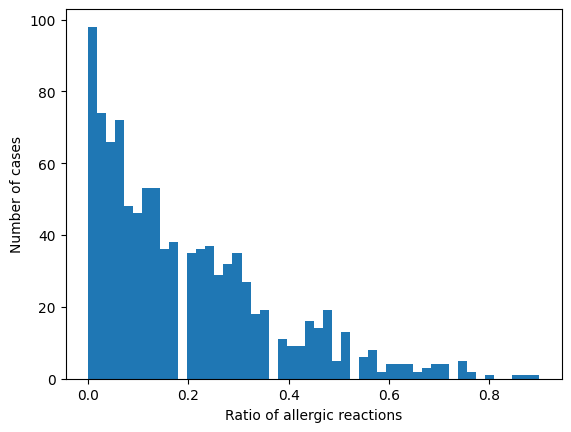

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# compile the model
priormodel = CmdStanModel(stan_file='prior.stan')

# generate samples
samples = priormodel.sample(fixed_param=True, iter_sampling=1000, iter_warmup=0, chains=1)

# calculate ratio of allergic reactions for each sample
calratio =samples.draws_pd()
ratios =[]
for i in range(1000):
    ratios.append(calratio.y[i]/50)

# create histogram of ratios
plt.hist(ratios, bins=50)
plt.xlabel('Ratio of allergic reactions')
plt.ylabel('Number of cases')
plt.show()

In [9]:
meanratio=np.mean(ratios)
meanratio

0.19310000000000002

In [10]:
posteriormodel = CmdStanModel(stan_file='posterior.stan')

# generate samples
samples2=posteriormodel.sample(data={'N':50, 'y':7},fixed_param=True, iter_sampling=1000, iter_warmup=0, chains=1)


14:21:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


14:21:42 - cmdstanpy - INFO - CmdStan done processing.


In [11]:
#Prior predicted value is correct to computed analyze

In [12]:
#Posterior distribution

In [13]:
df_1 = samples2.draws_pd()
df_1

,lp__,accept_stat__,p,y_pred
0,0.0,0.0,0.319436,16.0
1,0.0,0.0,0.319436,14.0
2,0.0,0.0,0.319436,17.0
3,0.0,0.0,0.319436,16.0
4,0.0,0.0,0.319436,14.0
...,...,...,...,...
995,0.0,0.0,0.319436,11.0
996,0.0,0.0,0.319436,19.0
997,0.0,0.0,0.319436,18.0
998,0.0,0.0,0.319436,17.0


In [14]:
y_pred_samples = samples2.stan_variable("y_pred")

In [15]:
allergic_reaction_ratio_1 = y_pred_samples / 50

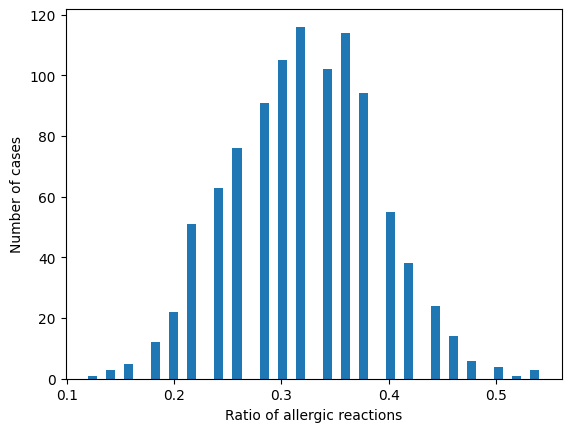

In [16]:
plt.hist(allergic_reaction_ratio_1, bins=50)
plt.xlabel('Ratio of allergic reactions')
plt.ylabel('Number of cases')
plt.show()

In [17]:
meanratio2=allergic_reaction_ratio_1.mean()
meanratio2

0.32152

In [18]:
#compute expected value and 94% density interval of predicted ratio 
ratio_ci = az.from_dict(posterior={'p':df_1.p, 'ratio': allergic_reaction_ratio_1})

p  = az.summary(ratio_ci, var_names='p', hdi_prob=0.94,round_to=3)
allergic_rate = az.summary(ratio_ci, var_names='ratio', hdi_prob=0.94, round_to=3)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


In [19]:
print(p)

    mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
p  0.319  0.0   0.319    0.319        0.0      0.0    1000.0    1000.0    NaN


In [20]:
print(allergic_rate)

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
ratio  0.322  0.068     0.2     0.44      0.002    0.002   793.914   953.777   

       r_hat  
ratio    NaN  


In [21]:
trad_p = 0.2
ratio_count = (allergic_reaction_ratio_1 < trad_p).sum()
ratio_prob = ratio_count/len(allergic_reaction_ratio_1)
print('Probability that ratio is lower than traditional vaccines: {:.2f}%'.format(ratio_prob*100))

Probability that ratio is lower than traditional vaccines: 2.10%
